# Part 1: Low Level Vision (image > image)
> ## Week 1 ( Basic Image Processing Techniques)¶
>> **06- Blending (Image pyramids)**

This is the curriculum for "Learn Computer Vision" by Siraj Raval on Youtube
https://github.com/llSourcell/Learn_Computer_Vision

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Blending(image pyramids) 

## Image pyramids
same object can be present in an image with different sizes and if we want to find them it is advisable to have multiple resolutions of the same image and then search the item in all of them.


An image pyramid is a collection of images - all arising from a single original image - that are successively downsampled until some desired stopping point is reached.


These are called pyramid because when they are kept in a stack with biggest image at bottom and smallest image at top look like a pyramid.

**low passs - gaussian** & **band pass - laplacian**


A **lowpass** pyramid is made by smoothing the image with an appropriate smoothing filter and then subsampling the smoothed image, usually by a factor of 2 along each coordinate direction. The resulting image is then subjected to the same procedure, and the cycle is repeated multiple times. Each cycle of this process results in a smaller image with increased smoothing, but with decreased spatial sampling density (that is, decreased image resolution). If illustrated graphically, the entire multi-scale representation will look like a pyramid, with the original image on the bottom and each cycle's resulting smaller image stacked one atop the other.

A **bandpass** pyramid is made by forming the difference between images at adjacent levels in the pyramid and performing some kind of image interpolation between adjacent levels of resolution, to enable computation of pixelwise differences.


#### Gaussian pyramid: Used to downsample images
 - In a Gaussian pyramid, subsequent images are weighted down using a Gaussian average (Gaussian blur) and scaled down. Each pixel containing a local average corresponds to a neighborhood pixel on a lower level of the pyramid. This technique is used especially in texture synthesis.

#### Laplacian pyramid: Used to reconstruct an upsampled image from an image lower in the pyramid (with less resolution)
 - A Laplacian pyramid is very similar to a Gaussian pyramid but saves the difference image of the blurred versions between each levels. Only the smallest level is not a difference image to enable reconstruction of the high resolution image using the difference images on higher levels. This technique can be used in image compression.

Higher level image(Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower level image(higher resolution). Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. By doing so, a M \times N image becomes M/2 \times N/2 image. So area reduces to one-fourth of original area. It is called an Octave. The same pattern continues as we go upper in pyramid (ie, resolution decreases). Similarly while expanding, area becomes 4 times in each level. 
We can find Gaussian pyramids in OpenCV using cv2.pyrDown() and cv2.pyrUp() functions.


In [2]:
def gamma_correction(img, gamma=0):
    """ 
    reads the input image and transforms it (non-linear transformation)
    Do the operation new_image = power(img / 255.0, gamma) * 255.0
    np.clip is used to keep pixel value between 0 and 255
    A look-up table is used to improve the performance of the computation 
    as only 256 values needs to be calculated once.
    """
    

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    img_new = cv2.LUT(img, lookUpTable)
    
    return img_new

### 1. downsampleing / DownSize / Zoom Out

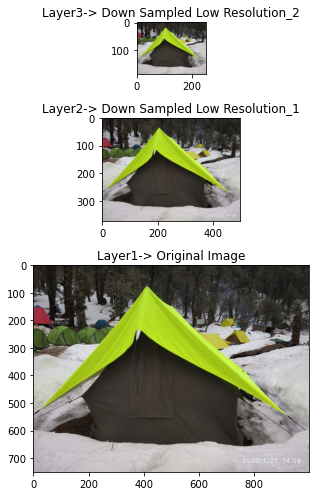

In [3]:
# Imagine the pyramid as a set of layers in which the 
# higher the layer, the smaller the size. 
# we go from bottom to top.
def pyramid_downsize(img):
    img1 = cv2.pyrDown(img)
    img2 = cv2.pyrDown(img1)
    
    return img1,img2


img = cv2.imread("img4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1, img2 = pyramid_downsize(img)

f, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,7), 
                                 gridspec_kw={'height_ratios': [1,2,4]})
ax1.imshow(img2)
ax1.title.set_text("Layer3-> Down Sampled Low Resolution_2")
ax2.imshow(img1)
ax2.title.set_text("Layer2-> Down Sampled Low Resolution_1")
ax3.imshow(img)
ax3.title.set_text("Layer1-> Original Image")   
f.tight_layout()

plt.imsave("downsized.jpg", img2)


### 2. upsampleing / upSize / Zoom in

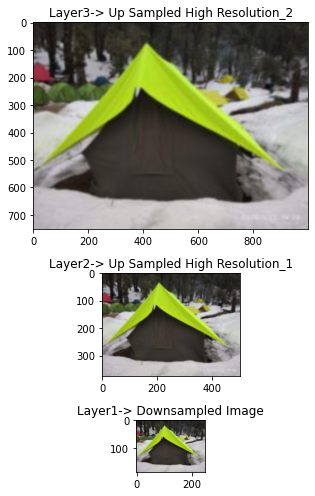

In [4]:
# Imagine the pyramid as a set of layers in which the 
# higher the layer, the larger the size.
# we go from bottom to top.
def pyramid_upsize(img):
    img1 = cv2.pyrUp(img)
    img2 = cv2.pyrUp(img1)
    return img1,img2

# let us take the downsampled image from pyramid_downsize() above
img = cv2.imread("downsized.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1, img2 = pyramid_upsize(img)

f, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,7), 
                                 gridspec_kw={'height_ratios': [4,2,1]})
ax1.imshow(img2)
ax1.title.set_text("Layer3-> Up Sampled High Resolution_2")
ax2.imshow(img1)
ax2.title.set_text("Layer2-> Up Sampled High Resolution_1")
ax3.imshow(img)
ax3.title.set_text("Layer1-> Downsampled Image")   
f.tight_layout()

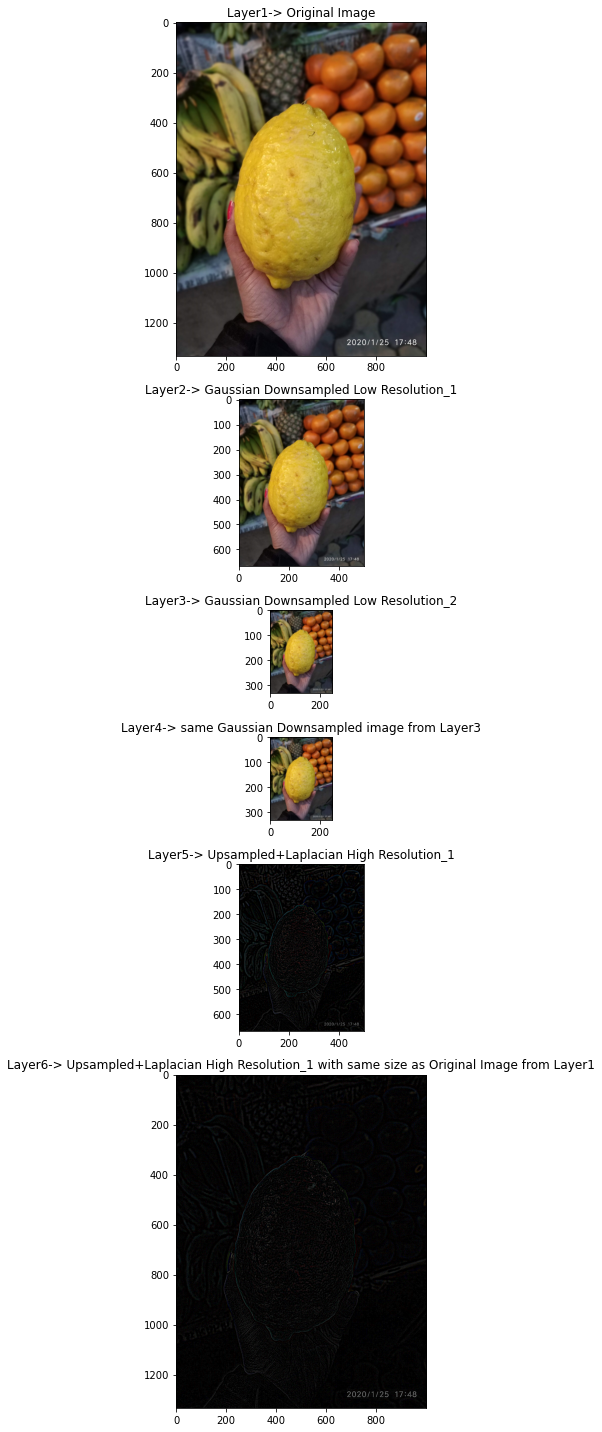

In [5]:
img = cv2.imread("fruit1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Gaussian Pyramid
layer = img.copy()
gaussian_pyramid = [layer]
for i in range(2):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)
    
##################################################

# Laplacian Pyramid
layer = gaussian_pyramid[2]

laplacian_pyramid = [layer]
for i in range(2, 0, -1):
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i - 1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)

##################################################

# adjusting contrast to enhance the contents
for i in range(1,3):
    laplacian_pyramid[i] = gamma_correction(laplacian_pyramid[i], .5)

##################################################

# plot 
f, (ax1, ax2,ax3,ax4,ax5,ax6 ) = plt.subplots(6,1, figsize=(20,20),
                                   gridspec_kw={'height_ratios': [4,2,1,1,2,4]})
ax1.imshow(gaussian_pyramid[0])
ax1.title.set_text("Layer1-> Original Image")
ax2.imshow(gaussian_pyramid[1])
ax2.title.set_text("Layer2-> Gaussian Downsampled Low Resolution_1")
ax3.imshow(gaussian_pyramid[2])
ax3.title.set_text("Layer3-> Gaussian Downsampled Low Resolution_2")   
ax4.imshow(laplacian_pyramid[0])
ax4.title.set_text("Layer4-> same Gaussian Downsampled image from Layer3")
ax5.imshow(laplacian_pyramid[1])
ax5.title.set_text("Layer5-> Upsampled+Laplacian High Resolution_1")
ax6.imshow(laplacian_pyramid[2])
ax6.title.set_text("Layer6-> Upsampled+Laplacian High Resolution_1 with same size as Original Image from Layer1") 
f.tight_layout()



### 3. image blending using pyramids

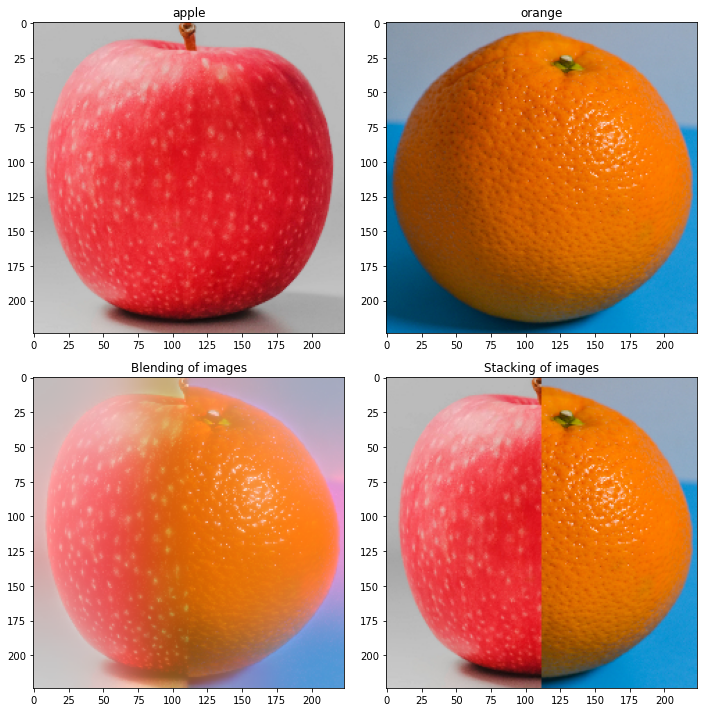

In [6]:
img1 = cv2.imread('apple.jpg')
img2 = cv2.imread('orange.jpg')

img1 = cv2.resize(img1, (224,224))
img2 = cv2.resize(img2, (224,224))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

footbase_ball = np.hstack((img1[:, :112], img2[:, 112:]))
# Gaussian Pyramid 1
layer = img1.copy()
gaussian_pyramid = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)
# Laplacian Pyramid 1
layer = gaussian_pyramid[5]
laplacian_pyramid = [layer]
for i in range(5, 0, -1):
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i - 1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)
# Gaussian Pyramid 2
layer = img2.copy()
gaussian_pyramid2 = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid2.append(layer)
# Laplacian Pyramid 2
layer = gaussian_pyramid2[5]
laplacian_pyramid2 = [layer]
for i in range(5, 0, -1):
    size = (gaussian_pyramid2[i - 1].shape[1], gaussian_pyramid2[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid2[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid2[i - 1], gaussian_expanded)
    laplacian_pyramid2.append(laplacian)
# Laplacian Pyramid Footbase_ball
footbase_ball_pyramid = []
n = 0
for img1_lap, img2_lap in zip(laplacian_pyramid, laplacian_pyramid2):
    n += 1
    cols, rows, ch = img1_lap.shape
    laplacian = np.hstack((img1_lap[:, 0:int(cols/2)], img2_lap[:, int(cols/2):]))
    footbase_ball_pyramid.append(laplacian)
# Reconstructed Footbase_ball
footbase_ball_reconstructed = footbase_ball_pyramid[0]
for i in range(1, 6):
    size = (footbase_ball_pyramid[i].shape[1], footbase_ball_pyramid[i].shape[0])
    footbase_ball_reconstructed = cv2.pyrUp(footbase_ball_reconstructed, dstsize=size)
    footbase_ball_reconstructed = cv2.add(footbase_ball_pyramid[i], footbase_ball_reconstructed)

# plot it
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
fig.set_tight_layout(True)
ax1.imshow(img1)
ax1.title.set_text("apple")
ax2.imshow(img2)
ax2.title.set_text("orange")
ax3.imshow(footbase_ball_reconstructed)
ax3.title.set_text("Blending of images")
ax3.imshow(footbase_ball_reconstructed)
ax3.title.set_text("Blending of images")
ax4.imshow(footbase_ball)
ax4.title.set_text("Stacking of images")

## references:
- https://docs.opencv.org/3.4/d4/d1f/tutorial_pyramids.html
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html
- http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/imagemosaic.html
- https://en.wikipedia.org/wiki/Pyramid_(image_processing)
- book Learning OpenCV by Bradski and Kaehler.
- https://pysource.com/2018/03/16/image-pyramids-blending-and-reconstruction-opencv-3-4-with-python-3-tutorial-24/
- https://pysource.com/2018/03/14/image-pyramids-opencv-3-4-with-python-3-tutorial-23/
- https://unsplash.com/photos/gDPaDDy6_WE
- https://unsplash.com/photos/hHZ_sKzEWRs
- https://www.google.com/imgres?imgurl=https%3A%2F%2Fcnet3.cbsistatic.com%2Fimg%2FDHoXqP1XGX8GhumaBQIbnaGxlBw%3D%2F940x0%2F2014%2F12%2F01%2F89601d70-ca65-4dc7-adfe-f6dbd46d05ba%2Fhobbit-lotr-5-armies-gandalf-hat.jpg&imgrefurl=https%3A%2F%2Fwww.cnet.com%2Fnews%2Fian-mckellen-gandalf-amazon-lord-of-the-rings-jrr-tolkien%2F&tbnid=7DLzMxrULUwpmM&vet=12ahUKEwiPnoue9P_tAhVgGbcAHbIqD_wQMygCegUIARCvAQ..i&docid=DclyE8MRAN-9FM&w=940&h=705&q=gandalf%20images&ved=2ahUKEwiPnoue9P_tAhVgGbcAHbIqD_wQMygCegUIARCvAQ
- https://www.google.com/imgres?imgurl=https%3A%2F%2Ffastly.syfy.com%2Fsites%2Fsyfy%2Ffiles%2F2018%2F05%2Fdumbledore.jpg&imgrefurl=https%3A%2F%2Fwww.syfy.com%2Fsyfywire%2Feverything-to-know-dumbledore-crimes-of-grindelwald-harry-potter&tbnid=u-few8SwW6b7MM&vet=12ahUKEwiLwfmw9P_tAhXDE7cAHXnUCjAQMygEegUIARC2AQ..i&docid=Sog9NnShoV2jQM&w=2048&h=1365&q=dumbledore%20images&ved=2ahUKEwiLwfmw9P_tAhXDE7cAHXnUCjAQMygEegUIARC2AQ
- https://www.learnopencv.com/alpha-blending-using-opencv-cpp-python/